In [55]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

In [56]:
with open("SavedFeatures/final_feature_vector.json", 'r') as f:
    XY = json.load(f)

In [57]:
step = 50000000
lo = 0
clss = 0

while(lo < 500000000 + 1):
    hi = lo + step
    lo_txt = lo
    hi_txt = hi
    if(lo_txt == 0):
        lo_txt = '---'
    if(lo_txt == 500000000):
        hi_txt = '+++'
    print('{} to {} :: {}'.format(lo_txt, hi_txt, clss))

    clss += 1
    lo += step

--- to 50000000 :: 0
50000000 to 100000000 :: 1
100000000 to 150000000 :: 2
150000000 to 200000000 :: 3
200000000 to 250000000 :: 4
250000000 to 300000000 :: 5
300000000 to 350000000 :: 6
350000000 to 400000000 :: 7
400000000 to 450000000 :: 8
450000000 to 500000000 :: 9
500000000 to +++ :: 10


In [58]:
len(XY)

8181

In [59]:
def getClass(revenue):
    clss = revenue//step
    return min(clss, 10)

In [60]:
xrr = []
yrr = []
frq_dst = {}
for i in range(11):
    frq_dst[i] = 0

for xy in XY:
    xrr.append(xy['feature'])
    yrr.append(getClass(xy['target']))
    frq_dst[getClass(xy['target'])] += 1

In [61]:
frq_dst

{0: 5082,
 1: 1063,
 2: 527,
 3: 351,
 4: 248,
 5: 177,
 6: 131,
 7: 109,
 8: 73,
 9: 60,
 10: 360}

# Normalize

In [62]:
mxrr = [0]*len(xrr[1])
len(mxrr)

178

In [63]:
for feature in xrr:
    for i in range(len(feature)):
        mxrr[i] = max(mxrr[i], feature[i])

In [77]:
nxrr = [[0]*len(xrr[0])]*len(xrr)

for i in range(len(xrr)):
    for j in range(len(xrr[i])):
        if(mxrr[j] != 0):        
            nxrr[i][j]= xrr[i][j]/mxrr[j]

In [78]:
xrr = np.array(xrr)
nxrr = np.array(nxrr)
yrr = np.array(yrr)

xrr.shape, nxrr.shape, yrr.shape

((8181, 178), (8181, 178), (8181,))

In [81]:
X_train, X_test, y_train, y_test = train_test_split(nxrr, yrr, test_size=0.30, random_state=17)

In [82]:
clf = svm.SVC(C = 100, gamma = 10)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [83]:
# nxrr[0]

In [85]:
# nxrr[0]

In [86]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=100, gamma=10):
              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1542
           1       0.00      0.00      0.00       306
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00       114

    accuracy                           0.63      2455
   macro avg       0.06      0.09      0.07      2455
weighted avg       0.39      0.63      0.48      2455


/home/arnab/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Prec

Confusion matrix:
[[1542    0    0    0    0    0    0    0    0    0    0]
 [ 306    0    0    0    0    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0    0    0    0    0]
 [ 107    0    0    0    0    0    0    0    0    0    0]
 [  69    0    0    0    0    0    0    0    0    0    0]
 [  56    0    0    0    0    0    0    0    0    0    0]
 [  32    0    0    0    0    0    0    0    0    0    0]
 [  37    0    0    0    0    0    0    0    0    0    0]
 [  25    0    0    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0    0    0    0]
 [ 114    0    0    0    0    0    0    0    0    0    0]]


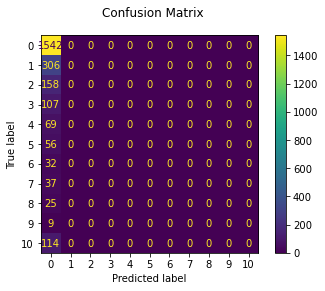

In [87]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rnd = RandomForestClassifier(max_depth=5, random_state=0)
rnd.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [90]:
predicted = rnd.predict(X_test)
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=100, gamma=10):
              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1542
           1       0.00      0.00      0.00       306
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00        69
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        32
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00       114

    accuracy                           0.63      2455
   macro avg       0.06      0.09      0.07      2455
weighted avg       0.39      0.63      0.48      2455


/home/arnab/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Prec

Confusion matrix:
[[1542    0    0    0    0    0    0    0    0    0    0]
 [ 306    0    0    0    0    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0    0    0    0    0]
 [ 107    0    0    0    0    0    0    0    0    0    0]
 [  69    0    0    0    0    0    0    0    0    0    0]
 [  56    0    0    0    0    0    0    0    0    0    0]
 [  32    0    0    0    0    0    0    0    0    0    0]
 [  37    0    0    0    0    0    0    0    0    0    0]
 [  25    0    0    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0    0    0    0]
 [ 114    0    0    0    0    0    0    0    0    0    0]]


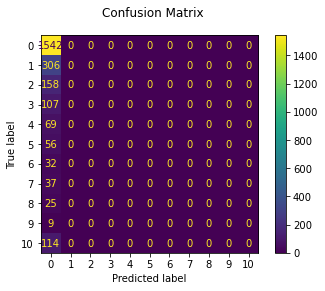

In [91]:
disp = metrics.plot_confusion_matrix(rnd, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()